# CS541: Applied Machine Learning, Spring 2025, Problem Set 2

### _Note: Do not delete or add blocks, do not change the function names. If you do this the autograder won't run properly and you might get a 0._

Problem set 2 is due in Gradescope on **March 6th at 11:59pm**.
All the questions are in this jupyter notebook file. There are four questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **130 points** (**90 pts** coding, and **40 pts** short answer).  Note that each individual pset contributes the same amount to the final grade regardless of the number of points it is worth.

After completing these questions you will need to covert this notebook into a .py file named **ps2.py** and a pdf file named **ps2.pdf** in order to submit it (details below).

**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors.**

There will be two separate submission links for the assignment:
1. Submit **ps2.py** to `PS2-Code`
2. Submit a single `.pdf` report that contains your work for all written questions to `PS2`. You can type your responses in LaTeX, or any other word processing software.  You can also hand write them on a tablet, or scan in hand-written answers. If you hand-write, please make sure they are neat and legible. If you are scanning, make sure that the scans are legible. Lastly, convert your work into a `PDF`. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py\
You can take a look at an example [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif)

  Your written responses in the PDF report should be self-contained. It should include all the output you want us to look at. You will not receive credit for any results you have obtained, but failed to include directly in the PDF report file.  Please tag the reponses in your PDF with the Gradescope questions outline  as described in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0).
  

**Assignment Setup**

You are strongly encouraged to use [Google Colab](https://colab.research.google.com/) for this assignment.

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python (you should install python version >= 3.9 as this notebook is tested with python 3.9), several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html).

If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.  After developing your code using Jupyter, you are encouraged to test it on Google Colab to ensure it works in both settings.


You cannot use packages other than the ones already imported in this assignment.

**Jupyter Tip 1**: To run a cell, press `Shift+Enter` or click on "play" button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.



**Jupyter Tip 2**: Use shortcut "Shift + Tab" to show the documentation of a function in Jupyter Notebook/ Jupterlab. Press Shift then double Tab (i.e., press Tab twice) to show the full documentation.\
For example, type `sum(` then Shift + Tab to show the documentation for the function, as shown in this the picture below.

In [1]:
## import some libraries
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
from typing import Tuple, List
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import mpl_toolkits.mplot3d

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# **Question 1.** PCA  (*30 total points*)

In this section, we will use principal component analysis (PCA) to perform dimensionality reduction. We will implement and use PCA on Iris dataset. Then, we compare our results with Sklearn's implementation and take a look at Plotly for visualization.

In [2]:
## Read Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

## **1.1 Code:** Feature normalization *(5 pts)*
It's a good practice to normalize the dataset before using PCA.

Write a function to map the data to $\mu = 0, \sigma = 1$ by performing $x = \frac{x - \mu}{\sigma}$ for each dimension.\
 You have to use numpy for this question.

In [3]:
def question_1_1(X: np.ndarray) -> np.ndarray:
    """
        X: numpy array, shape (num samples, feature dim)
        return: a normalized numpy array with the same size
    """

    # Write your code in this block -----------------------------------------------------------
    m = np.mean(X, axis=0)
    s = np.std(X, axis=0)

    X_norm = (X - m) / s

    return X_norm
    # End of your code ------------------------------------------------------------------------

## Test your function
X_norm = question_1_1(X)
X_norm[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## **1.2 Code:** SVD *(10 pts)*

The goal of this question is to use SVD to implement the remaining components of the PCA algorithm.

Singular Value Decomposition (SVD) is a factorization of a real or complex matrix.

Let $M \in \mathbb{R}^{m \times n}$ be a matrix rank $r$, the SVD of $M$ is a decomposition of the form
  $$ M = U \Sigma V^T $$
where $U \in \mathbb{R}^{m \times m}$ is an orthogonal matrix ($U^T U = I$), $V \in \mathbb{R}^{n \times n}$ is an orthogonal matrix, and $\Sigma \in \mathbb{R}^{m \times n}$ is a diagonal matrix with $r$ positive scalars $\sigma_1, \dots, \sigma_r$ on the diagonal (in the $r \times r$ block on the upper left) and zeros everywhere else. The scalars $\sigma_1, \dots, \sigma_r$ are called the singular values and are given by
  $$\sigma_i = \sqrt{\text{$i$-th eigenvalue of $M^\top M$}},$$
and by convention they appear in non-increasing order:
  $$\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r.$$
The columns of $U$ and $V$ respectively are called the left and right singular vectors of $M$, and can be obtained by taking an orthonormal set of eigenvectors for the matrices $M M^T$ and $M^T M$.

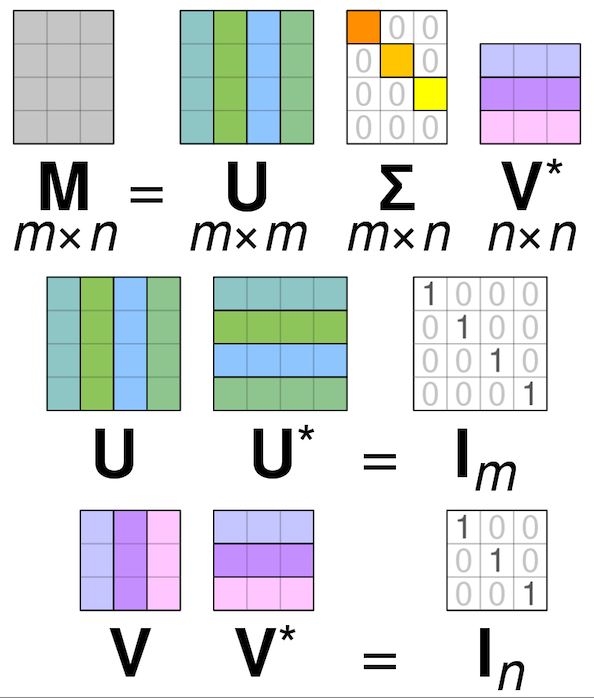

In [4]:
## Here's a quick recap on SVD (Figure from wiki)
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/svd.png")

In [5]:
def question_1_2(X_norm: np.ndarray, n_components: int) -> np.ndarray:
    """
    Computes the reduced data representation when projecting onto the top "k" eigenvectors
    X_norm: numpy array, shape of (num samples, feature dim)
    n_components: the number of components to project the data
    return: numpy array, shape (num samples, `n_components`)
    """

    # Write your code in this block -----------------------------------------------------------
    cov_matrix = np.cov(X_norm.T)
    U, S, V = np.linalg.svd(cov_matrix)
    U_reduced = U[:, :n_components]
    X_reduced = X_norm @ U_reduced
    ## return the reduced data
    return X_reduced


    # End of your code ------------------------------------------------------------------------

## Test your function
X_reduced = question_1_2(X_norm, n_components = 3)

## show result as a data frame
df_ans = pd.DataFrame(X_reduced, columns=['PCA{i}'.format(i=i) for i in range(1, X_reduced.shape[1] + 1)])
df_ans.head(5)

,PCA1,PCA2,PCA3
0,2.264703,-0.480027,0.127706
1,2.080961,0.674134,0.234609
2,2.364229,0.341908,-0.044201
3,2.299384,0.597395,-0.091290
4,2.389842,-0.646835,-0.015738


## **1.3 Code:** PCA using Sklearn *(10 pts)*
Complete the function below to perform the PCA using Sklearn. You should refer to the document [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to complete this question.

To pick top $k$ components out of $r$, we sort all the eigenvalues in descending order, and the top $k$ corresponding eigenvectors.\
We measure the accumulation of variance explained in top $k$ components:
$\text { cumulative variance explained }=\frac{\sum_{j=1}^k \lambda_j}{\sum_{i=1}^r \lambda_i}$, where $\lambda_i$ is eigenvalues

In [6]:
from sklearn.decomposition import PCA

def question_1_3(X: np.ndarray, n_components: int) ->  Tuple[np.ndarray, np.ndarray]:
    """
        perform PCA using Sklearn.
        You can use PCA from `sklearn.decomposition`
        X: numpy array, shape (num samples, feature dim)
        n_components: number of components
        return: a tuple (`X_reduced`, `var_explained`), where
          + `X_reduced` is the reduced data of `X`, numpy array shape (num samples, `n_components`)
          + `cum_var_explained` is the percentage of variance explained if we choose the top 1, 2, ..., `n_components` components,
           numpy array shape (`n_components`,)

    """

    # Write your code in this block -----------------------------------------------------------
    # for `cum_var_explained`, look at `explained_variance_ratio_` attribute of Sklearn's PCA
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

    # End of your code ------------------------------------------------------------------------
    return (X_reduced, cum_var_explained)


## Test your function
X_reduced, cum_var_explained = question_1_3(X_norm, n_components=3)

## check out cum_var_explained:
for i in range(len(cum_var_explained)):
  print(f"top {i+1} component(s) explained {cum_var_explained[i]} of variance")

## Show the result as a data frame
df = pd.DataFrame(X_reduced, columns=['PC{i}'.format(i=i) for i in range(1, X_reduced.shape[1] + 1)])
df['species'] = y
df.head(5)

top 1 component(s) explained 0.7296244541329987 of variance
top 2 component(s) explained 0.9581320720000165 of variance
top 3 component(s) explained 0.9948212908928452 of variance


,PC1,PC2,PC3,species
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


The PCA result should be the same to our implemetation in question 1.2, except the sign of the columns.

## **1.4 Short Answer:** Look at the variance captured in just the top 1 and then in the top 3 (this includes top eigenvectors 1,2,3). What do you infer from these numbers? Do you think using just the top 1 will capture the data better or all top 3? (2.5 pts)

The top 1 component captures ~72% of the variance, while the top 3 capture ~99%. Using only the first component loses significant information, whereas the top 3 retain almost all information. Therefore, using all top 3 components better preserves the data.

## **1.5 Short Answer:** Would you recommend using PCA for regularization (to avoid overfitting) ? Justify your answer with a brief explanation. (2.5 pts)

PCA reduces dimensionality, helping prevent overfitting by removing noise and redundant features. However, it is not a direct regularization technique as it does not explicitly constrain model complexity. While PCA can be useful, dedicated regularization methods are usually preferred for preventing overfitting.

**Visualize PCA**: When it comes to interactive visualization, [plotly](https://plotly.com/python/) is a good package we can use. It can be installed using pip `pip install plotly==5.10.0`
or conda `conda install -c plotly plotly=5.10.0`


In [7]:
## 2D plot
import plotly.express as px
fig = px.scatter(df, x='PC1', y='PC2',
              color='species')
fig.show()
## you can try to interact with the chart such as mousing over the point, zooming in (by cropping)

In [8]:
## 3D plot
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color='species', )
fig.update_traces(marker_size = 4)
fig.show()
## you can try to interact with the plot such as zoom in/out, rotate the chart

# **Question 2.** K-means (*25 total points*)

For this section, we will first implement K-means using numpy. Then, we will see how to use K-means with Sklearn.

In [9]:
## we set up the dataset and some plot functions to visualize the clusters.

import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.misc


def plot_cluster(samples, centroids, clusters=None):
    """
    Plot samples and color it according to cluster centroid.
    :param samples: samples that need to be plotted.
    :param centroids: cluster centroids.
    :param clusters: list of clusters corresponding to each sample.
    If clusters is None, all points are plotted with the same color.
    """

    colors = ['blue', 'green', 'gold']
    assert centroids is not None

    if clusters is not None:
        sub_samples = []
        for cluster_id in range(centroids[0].shape[0]):
            sub_samples.append(np.array([samples[i] for i in range(samples.shape[0]) if clusters[i] == cluster_id]))
    else:
        sub_samples = [samples]

    plt.figure(figsize=(8, 6))

    for cluster_id, clustered_samples in enumerate(sub_samples):
        plt.plot(clustered_samples[:, 0], clustered_samples[:, 1], 'o', color=colors[cluster_id], alpha=0.75,
                 label='Data Points: Cluster %d' % cluster_id)

    # Drawing a history of centroid movement, first centroid is black
    tempx, tempy = [], []
    for mycentroid in centroids:
        tempx.append(mycentroid[:, 0])
        tempy.append(mycentroid[:, 1])

    plt.plot(tempx, tempy, 'rx--', markersize=8)
    plt.plot(tempx[0], tempy[0], 'kx', markersize=8)

    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    if len(centroids) > 1:
        plt.title(f'Plot of samples, #iterations = {len(centroids)}', fontsize=16)
    else:
        plt.title(f'Plot of samples', fontsize=16)
    plt.grid(True)

    plt.legend(loc=4, framealpha=0.5)
    plt.show(block=True)


In [10]:
## Read 300 2-d samples
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/kmean_data.csv")
samples = df.values  ## convert data frame to numpy
print(type(samples), samples.shape)

<class 'numpy.ndarray'> (300, 2)


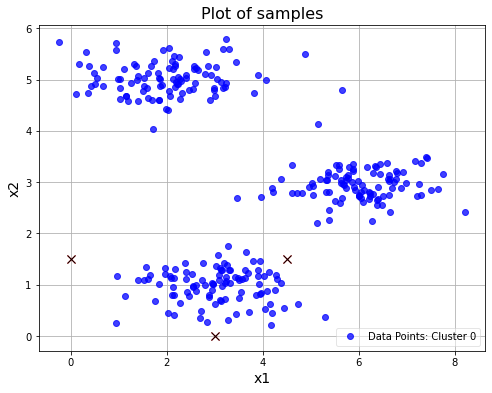

In [11]:
# Choose some random initial centroids, then plot the dataset with the centroids (denoted by "x")
initial_centroids = np.array([[3, 0], [4.5, 1.5], [0, 1.5]])
plot_cluster(samples, [initial_centroids])

## **2.1 Code:** K-means - Find closest centroid *(7 pts)*

In the cluster assignment phase of the $K$-means algorithm, the
algorithm assigns every training example $x_i$ to its closest centroid,
given the current positions of centroids. Specifically, for every
example $x_i$ we set

$$c_i := \arg\min_j ||x_i - \mu_j||^2$$

where $c_i$ is the index of the centroid that is closest to $x_i$, and $j$
is the position (index) of the $j$-th centroid.

You will need to complete the function below to find the closest centroid for all samples.

In [12]:
def question_2_1(samples: np.ndarray, centroids: np.ndarray) -> np.array:
    """
    Find the closest centroid for all samples.

    samples: numpy array, shape of (num samples `x`, num dimensions `d` = 2), input samples.
    centroids: numpy array, shape of (num clusters `k` = 3, num dimensions `d` = 2), array of `k` cluster centroids.
    return: a  numpy array shape (num samples `x`, ) that contains cluster assignments (indices) for each sample.
    """
    # Write your code in this block -----------------------------------------------------------
    dist = np.linalg.norm(samples[:, None] - centroids, axis=2)
    cluster_assigns = np.argmin(dist, axis=1)
    return cluster_assigns
    # End of your code ------------------------------------------------------------------------


In [13]:
## test your function
clusters = question_2_1(samples, initial_centroids)
clusters

array([2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

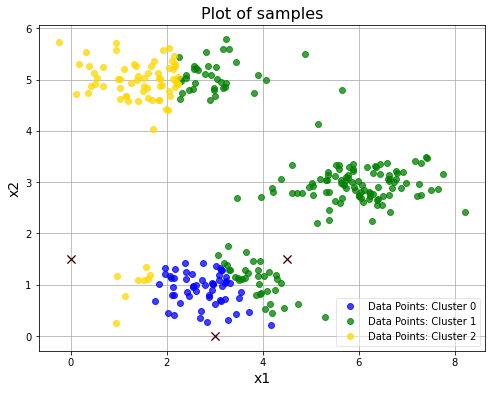

In [14]:
## plot your results (see the colors for the clusters)
plot_cluster(samples, [initial_centroids], clusters)

## **2.2 Code:** K-means - Update Centroids  *(8 pts)*

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it. Specifically, for every centroid $k$ we set

$$\mu_k := \frac{1}{|C_k|}\sum_{x_i\in C_k} x_i$$

where $C_k$ is the set of examples that are assigned to centroid $k$.
Concretely, if only three samples say $\{1, 2\}$, $\{3,4\}$ and $\{5,6\}$ are assigned to centroid
$k= 2$, then you should update

$$\mu_2=\frac{1}{3} \{ (1+3+5), (2+4+6)\} = \{ 3, 4 \}$$


In [15]:
def question_2_2(samples: np.ndarray, clusters: np.ndarray) -> np.ndarray:
    """
    Find the new centroid (mean) given the samples and their current cluster.

    samples: numpy array, shape (num samples `x`, num dimensions `d` = 2)
    clusters: numpy array, shape (num samples `x`, ), contains cluster indices (results from previous question)
    return an numpy array of new centroids, shape (num clusters `k` = 3, num dimensions `d` = 2)
    """
    ## Hint: You can initialize `k` "sum" variables, and `k` "count" variables.
    # A "sum" variable is to compute cumulative sum of all data samples in a cluster,
    # while "count" is to count how many of them in there.
    # You can go over each sample at a time, update its corresponding "sum" and "count".
    # After that, you should be able to get the new centroids.


    # Write your code in this block -----------------------------------------------------------
    k = len(np.unique(clusters))
    new_centroid = np.zeros((k, samples.shape[1]))
    for i in range(k):
        new_centroid[i] = np.mean(samples[clusters == i], axis=0)
    return  new_centroid
    # End of your code ------------------------------------------------------------------------



## test your function
question_2_2(samples, clusters)

array([[2.75025225, 0.91645498],
       [4.92723905, 3.02696871],
       [1.42342507, 4.55286883]])

In [16]:
## Let's see how our implementation works

def run_k_means(samples, initial_centroids, max_n_iter, verbose=False):
    """
    Run K-means algorithm. The number of clusters 'K' is defined by the size of initial_centroids
    :param samples: samples.
    :param initial_centroids: a list of initial centroids.
    :param max_n_iter: maximum number of iterations to run. We will stop when the centroids don't get updated.
    :return: a pair of cluster assignment and history of centroids.
    """

    centroid_history = []
    current_centroids = initial_centroids
    clusters = []
    for iteration in range(max_n_iter):
        centroid_history.append(current_centroids)

        clusters = question_2_1(samples, current_centroids)
        current_centroids = question_2_2(samples, clusters)

        if np.array_equal(current_centroids, centroid_history[-1]): ## no change
            break

        if verbose:
            print("Iteration %d, Finding centroids for all samples..." % iteration)
            print("Recompute centroids...")
    return clusters, centroid_history

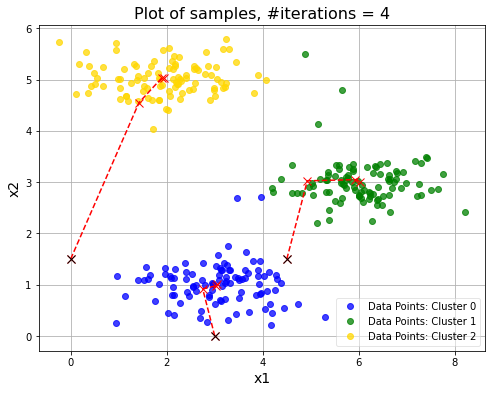

In [17]:
clusters, centroid_history  = run_k_means(samples, initial_centroids, max_n_iter=10)
plot_cluster(samples, centroid_history, clusters)

## **2.3 Short answer:** K-means - Centroid initialization  *(5 pts)*

K-means is quite sensitive to the initialization of k centroids. In practice, K-means algorithm will be run several times, each with a different centroid seed, which is what [Sklearn's KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) does under the hood. We then pick the best one based on some criterion. In this question, we will re-run K-means to conduct an experiment on centroid initialization. You will need to answer the question at the end of this section.

In [18]:
def choose_random_centroids(samples, k):
    """
    Randomly choose k centroids from samples.
    :return: an array of centroids.
    """
    rand_indices = random.sample(range(0, samples.shape[0]), k)
    return np.array([samples[i] for i in rand_indices])

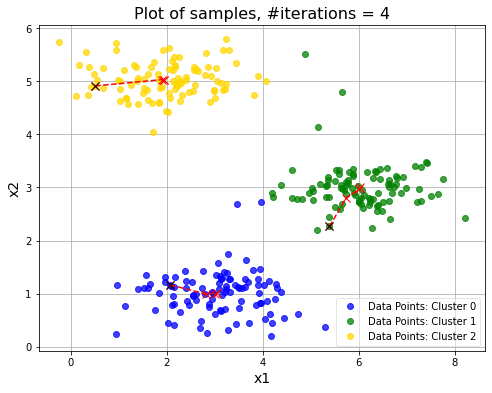

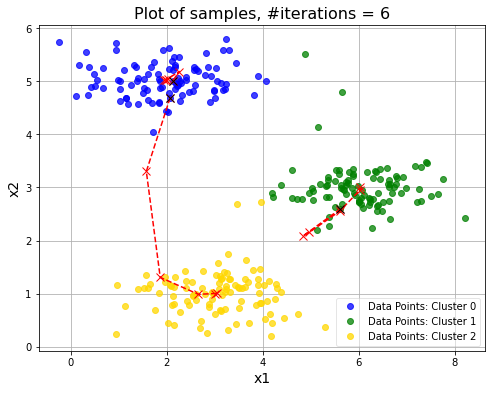

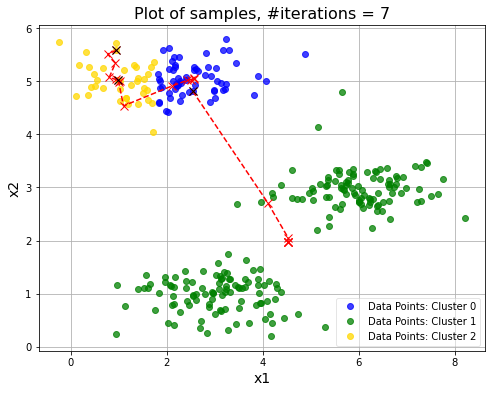

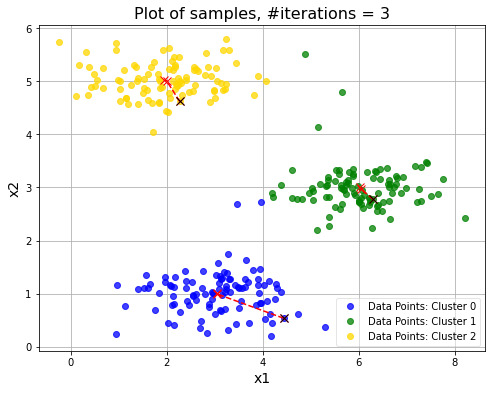

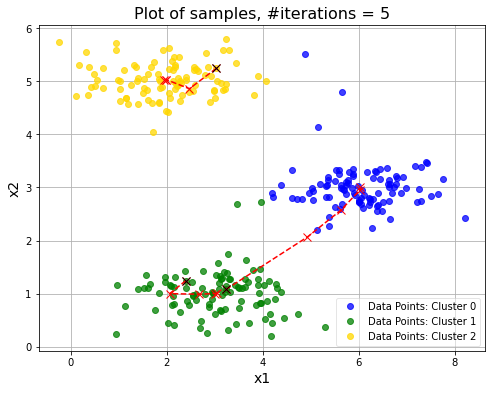

In [19]:
## We will run 5 times with different initialization
num_runs = 5
k = 3
max_n_iter = 10
for i in range(num_runs):
    random.seed(i)
    init_centroids = choose_random_centroids(samples, k)
    clusters, centroid_history  = run_k_means(samples, init_centroids, max_n_iter=max_n_iter)
    plot_cluster(samples, centroid_history, clusters)


**Question:** How the random initialization affects the KMeans algorithms (in terms of number of iterations, cluster assigments)?

Random initialization affects K-means in two ways:

* Number of iterations – The third plot took 7 iterations to converge, while the fourth only took 3 iterations, showing how a better initial choice speeds up convergence.
* Cluster assignments – The same two plots resulted in different cluster formations. In the third plot, K-means failed to identify the three naturally separated clusters, while the fourth plot quickly captured the correct structure.

## **2.4 Short answer:** K-means -  Elbow method  *(3 pts)*

The Elbow method can be useful to choose the number of clusters `k` in KMeans.

First, we plot the **sum of squared distances of samples to their closest cluster center** by `k`.\
Then, we pick `k` where the distance falls suddenly. The idea is to find where  diminishing returns are no longer worth the additional cost.

In this section, we will use K-means implementation from Sklearn. You can refer to the document [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).


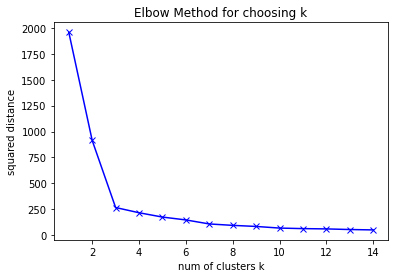

In [20]:
from sklearn.cluster import KMeans

def show_elbow():
    squared_distances = []
    k_list = range(1,15)
    for k in k_list:
        km = KMeans(n_clusters=k)
        km = km.fit(samples)
        squared_distances.append(km.inertia_)

    plt.plot(k_list, squared_distances, "bx-")
    plt.xlabel("num of clusters k")
    plt.ylabel("squared distance")
    plt.title("Elbow Method for choosing k")
    plt.show()

show_elbow()

**Question:** Which are good values for $k$ on the dataset? Should we pick $k=14$ as it has the least sum squared distance? Briefly explain your choices.

Good values for $k$ are found where the sum squared distance stops decreasing significantly. From the graph, the elbow appears around $k = 3$. Choosing $k = 14$ is not ideal. While it minimizes the sum squared distance, the clusters become too small, potentially leading to overfitting.

## **2.5 Short answer:** K-means on sample dataset  *(2 pts)*

There's [a good playground](https://cartography-playground.gitlab.io/playgrounds/clustering-comparison/) where you can play around with K-means algorithms on your own datasets. In this question, you will need to determine if K-means can work well on the 2-d dataset below.

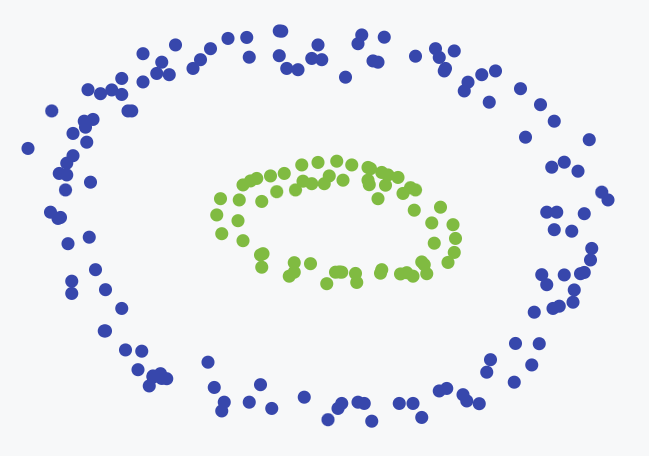

In [21]:
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/kmeans_pic.png")

**Question:** Let's say we have 2-cluster dataset (blue outer circle and green inner circle). If we apply K-means directly on the dataset, and assume we know in advance $k=2$ (i.e., 2 clusters), will applying K-means algorithm with k = 2 result in surfacing these 2 clusters correctly? Justify your answer.

No, kmeans with $k = 2$ will not correctly separate these clusters because it assumes clusters are globular and uses straight line boundaries, which fails for the structure of this dataset.

# **Question 3.** Use case of K-means and PCA (*20 total points*)

In this section, we will work with California Housing dataset. The dataset was adapted from [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).

The dataset was based on the 1990 California census data. It consists of 20428 samples. There are seven continuous columns, and one categorical column. You can find more information about the dataset at [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).


In [22]:
## read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps2/housing_cleaned_v3.csv")
print("data shape:", df.shape) ## number of rows, columns
df.sample(10)  ## show 10 random samples to get a sense of the dataset

data shape: (20428, 8)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5215,43.0,2167.0,254.0,761.0,256.0,13.6842,500001.0,<1H OCEAN
1648,13.0,1610.0,198.0,703.0,217.0,8.7059,329400.0,INLAND
3283,28.0,1503.0,370.0,522.0,268.0,1.2029,68900.0,INLAND
8189,39.0,4075.0,1085.0,2470.0,1025.0,2.3317,222500.0,NEAR OCEAN
2764,20.0,1468.0,283.0,721.0,270.0,3.0817,118800.0,INLAND
2698,18.0,1715.0,337.0,1166.0,333.0,2.2417,79200.0,INLAND
15128,31.0,2128.0,520.0,1049.0,485.0,4.0270,290000.0,NEAR OCEAN
1872,22.0,3119.0,640.0,786.0,351.0,3.0806,118500.0,INLAND
1768,47.0,1275.0,275.0,844.0,273.0,2.8967,95600.0,NEAR BAY
11262,27.0,1732.0,303.0,1115.0,308.0,5.5312,239200.0,<1H OCEAN


In [23]:
## We will use the first 7 continuous columns as features, and the categorical column as label
# Let's see how many classes we have, and how many samples in each class
df["ocean_proximity"].value_counts()  ## (class name, number of samples)

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: count, dtype: int64

In [24]:
# We need to do a bit of proccessing here.
# First, we map string label to number
label_map = {
            "<1H OCEAN": 0,
            "INLAND": 1,
            "NEAR OCEAN": 2,
            "NEAR BAY" : 3}

X, y = df.values[:, :-1], df["ocean_proximity"].map(label_map).values
print("features shape:", X.shape)
print("label shape:", y.shape)
print("-"*5)

## Let's see what we have for a pair of (features, label)
print("features: ", X[0])
print("label: ", y[0])

features shape: (20428, 7)
label shape: (20428,)
-----
features:  [41.0 880.0 129.0 322.0 126.0 8.3252 452600.0]
label:  3


In the following questions, assume that we know in advance there're 4 clusters (i.e., 4 different classes) in the dataset.


## **3.1 Code:** Evaluating K-means *(5 pts)*
In this question, you will make and train (i.e., use `fit()` to compute clustering) a [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) model using sklearn.
the model will get raw feature `X` as the input.


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from time import time

In [26]:
def question_3_1(X: np.ndarray, k: int, random_state: int) -> sklearn.cluster.KMeans:
  """
    Train a K-means model on raw feature X.
    X: numpy array, shape of (20428, 9)
    k: number of clusters for K-means
    random_state: random seed, passed to K-means when initializing.
    return the trained K-means model (remember to call `fit()` function)
  """
  # Write your code in this block -----------------------------------------------------------
  start_time = time()
  kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
  kmeans.fit(X)
  print(f"runtime: {time() - start_time} seconds")
  return kmeans
  # End of your code ------------------------------------------------------------------------


## Test your model:
k = 4  ## assume we know there should be 4 cluters
random_state = 2022  ## to reproduce the same results for different runs
kmeans = question_3_1(X, k, random_state)

runtime: 0.1826171875 seconds


**Now, K-means has converged on 4 clusters. How can we evaluate this?**

Recall that K-means is an unsupervised algorithm. Hence, it found patterns in the data and assigned it some labels without looking at the annotated labels in the dataset.

Therefore, the numbering of these labels may not in any way correspond to the way the dataset annotators annotated it.

**So, now that we have 4 cluster ids from K-means, we need to map them to the 4 annotated labels in the dataset based on the "best" possible assignment**

Normally, we would do this "best" matching on a training set, and then evaluate on a held out test set. But, for this exercise, let's find the best matching possible on the entire set.

One way to do this would be to calculate the mean features from datapoints using ground truth labels. Then we can assign the predicted cluster ids to the labels based on the cluster center that is closest to the mean features.




=====

## 3.2 Code: Now, let's compute the mean features for each label (5 pts)

In [27]:
X[:1]

array([[41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 452600.0]], dtype=object)

In [28]:
from collections import defaultdict
def question_3_2(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
        compute the average feature vector for each class.
    """

    class_means = defaultdict(list) # should have keys as the unique class labels in y and the values are the mean feature vector for that class from the X data.
    # Write your code in this block -----------------------------------------------------------
    unique_labels = np.unique(y)
    for label in unique_labels:
        class_means[label] = np.mean(X[y == label], axis=0)

    # End of your code ------------------------------------------------------------------------
    return class_means

class_means = question_3_2(X, y)
print(class_means)

defaultdict(<class 'list'>, {0: array([29.277396502103166, 2627.2334514058, 546.5391852999778,
       1518.4404471994687, 517.4190834624751, 4.231100520256803,
       240267.99081248615], dtype=object), 1: array([24.26262315270936, 2721.2529248768474, 533.8816194581281,
       1392.4114839901479, 478.0069273399015, 3.2103587130541835,
       124896.86314655172], dtype=object), 2: array([29.31468797564688, 2587.165525114155, 538.6156773211568,
       1355.6373668188737, 501.52891933028917, 4.006374467275495,
       249042.35502283106], dtype=object), 3: array([37.75638766519824, 2490.3352422907487, 514.1828193832599,
       1227.8810572687225, 487.2361233480176, 4.175646916299569,
       259279.29207048457], dtype=object)})


### Now, we will have to map the predicted cluster numbers to the labels based on which cluster center is nearest to the mean features for our label classes.

In [29]:
# we will use a technique called "Hungarian algorithm" to find the best matching between clusters and labels
# this is implemented using linear_sum_assignment function from scipy
# you are not reuqired to learn this, but you can read more about it here: https://en.wikipedia.org/wiki/Hungarian_algorithm
from scipy.optimize import linear_sum_assignment

def create_map(kmeans, class_means):
    cluster_to_label_map = {} # this would have a mapping from cluster index to class label

    # first we create a cost matrix that calculates a cost for each cluster center index and label pair
    cost_matrix = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            cost_matrix[i, j] = np.linalg.norm(kmeans.cluster_centers_[i] - class_means[j])

    # then we use linear_sum_assignment to find the best matching between clusters and labels
    row_ind, col_ind = linear_sum_assignment(cost_matrix)


    for i in range(k):
        cluster_to_label_map[i] = col_ind[i]

    print("Best mapping of kmeans cluster id to class label:")
    print(cluster_to_label_map)

    return cluster_to_label_map

cluster_to_label_map = create_map(kmeans, class_means) # you must use this to map your K-Means prediction while evaluating accuracy with the y labels

Best mapping of kmeans cluster id to class label:
{0: 3, 1: 2, 2: 1, 3: 0}


### From now on, make sure to call `cluster_to_label_map(pred)` on your predicted cluster ids when evaluating accuracy with the `y` labels


## **3.3 Code:** K-means - Accuracy score  *(5 pts)*


The cluster's labels of Sklearn's K-means model can be accessed by attribute `labels_`.
We can measure the performance of k-means by computing accuracy score of cluster's label with the ground-truth labels `y`

In [30]:
def question_3_3(kmeans: sklearn.cluster.KMeans, y: np.ndarray, cluster_to_label_map: dict) -> float:
  """
    Compute accuracy score of k-means algorithms
    kmeans: the trained k-means model from the previous question
    y: ground-truth labels, numpy array shape of (20428, )
    return the accuracy score of k-means: a float number in range [0, 1]
  """
  # Write your code in this block -----------------------------------------------------------
  y_pred = kmeans.labels_
  mapped_pred = np.vectorize(cluster_to_label_map.get)(y_pred)
  acc = accuracy_score(y, mapped_pred)
  print(np.unique(y_pred), np.unique(y))
  print(cluster_to_label_map)  
  return acc
  # End of your code ------------------------------------------------------------------------


## Test your function
question_3_3(kmeans, y, cluster_to_label_map)

[0 1 2 3] [0 1 2 3]
{0: 3, 1: 2, 2: 1, 3: 0}


0.5030350499314666


## **3.4 Short Answer:** What is the chance (random) accuracy here and are we doing better than it? Is K-means best suited for this task, or would you use some other algorithm? (2 pts)


The random accuracy assuming balanced dataset is $\frac{1}{4}$. Our Kmeans accuracy ~0.5 is significantly better than that. However, Kmeans is not the best choice for this task because it assumes globular clusters and uses Euclidean distance, which may not capture the relationships in the data. Since we have labeled data, a supervised method (Random Forest, Logistic Regression) would likely perform better.

## **3.5 Short answer :** K-means with PCA  *(3 pts)*
Working with high dimensional data is challenging. First, it's hard to visualize all the dimensions. It also takes much more time to run the algorithms on the large amount of data.

One idea is to combine PCA with K-means. To begin with, we apply PCA on the data to reduce the number of features, then fit a K-means model on the reduced features.\
We will try apply PCA with 1, 2, ..., up to all components, to see how it affects the k-means results on the dataset.


In [31]:
from time import time
num_features = X.shape[1]
for n_components in range(1, num_features + 1 ):
  start_time = time()  ## measure runtime of PCA+kmeans

  ## PCA
  sklearn_pca = sklearn.decomposition.PCA(n_components=n_components)
  X_reduced = sklearn_pca.fit(X).transform(X)

  ## K-means
  kmeans =  KMeans(n_clusters=k, random_state=random_state).fit(X_reduced)

  runtime = time() - start_time

  # evaluate accuracy
  class_means = question_3_2(X_reduced, y)
  cluster_to_label_map = create_map(kmeans, class_means)


  print(f"n_components = {n_components}, accuracy = {question_3_3(kmeans, y, cluster_to_label_map)}, runtime = {runtime}")

Best mapping of kmeans cluster id to class label:
{0: 1, 1: 3, 2: 2, 3: 0}
[0 1 2 3] [0 1 2 3]
{0: 1, 1: 3, 2: 2, 3: 0}
n_components = 1, accuracy = 0.49877618954376346, runtime = 0.06482887268066406
Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
[0 1 2 3] [0 1 2 3]
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 2, accuracy = 0.5020070491482279, runtime = 0.0629580020904541
Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
[0 1 2 3] [0 1 2 3]
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 3, accuracy = 0.5021049539847269, runtime = 0.07001805305480957
Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
[0 1 2 3] [0 1 2 3]
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 4, accuracy = 0.5021049539847269, runtime = 0.08705687522888184
Best mapping of kmeans cluster id to class label:
{0: 1, 1: 2, 2: 3, 3: 0}
[0 1 2 3] [0 1 2 3]
{0: 1, 1: 2, 2: 3, 3: 0}
n_components = 5, accuracy = 0.5021049539847269, runtime = 0.066558837890625
Best ma

**Question:** Compare the result (accuracy, runtime) in question 3.3 with the *K-means & PCA* results.\
Compare the results of `n_components = 7` with the results in question 3.3. Explain why they are the same/different.

The accuracy for Kmeans & PCA with 7 components is almost the same as in question 3.3 (0.5021 vs. 0.5030). This happens because no actual dimensionality reduction occurred (our dataset has 7 features). PCA with 7 components simply transformed the features without discarding variance. However, runtime is slightly lower, likely because PCA removes correlations between features, making Kmeans operate more efficiently. Since no information was lost, the clustering results remained almost identical.

In general, we notice that applying PCA before Kmeans does not significantly change accuracy (which remains around 50% regardless of the number of components). However, runtime decreases as the number of PCA components is reduced.

# **Question 4.**  GMM vs Kmeans  (*55 total points*)
In previous question, we encountered the case where k-means is not performing well on 2-d dataset
In this section, we will work on GMM and see how it can help to solve these problems.

Recall that with GMM, we start by placing guassians randomly, then we iterate over these two following steps until it converges.

  + E step: Assign probability of each data point $x_i$ coming from each guassian based on current means and variances.
  + M step: Re-estimate the guassians' mean and variance to better fit the data points.

It's interesting that [GMM of Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) uses *K-means* and *K-means++* (a *K-means*'s variant) for its first guess (i.e., to initialize the weights, the means and the precisions).

## **4.1 Code:** Image segmentation  *(10 pts)*


shape of the image: (469, 707, 3)
there are 331583 pixels in the image.


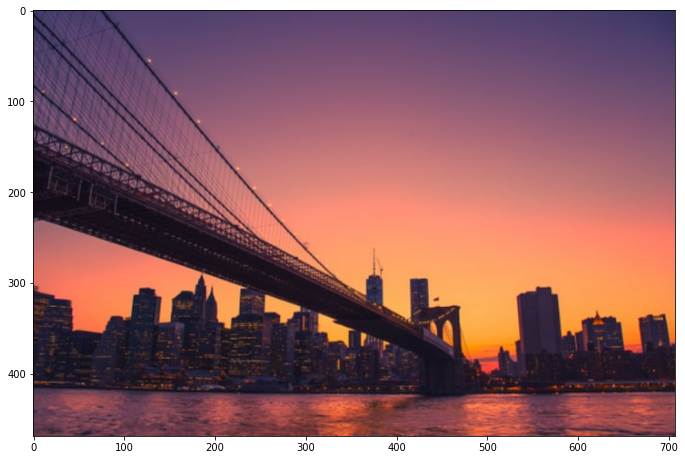

In [102]:
## First, let's read an image of sunset over New York city (image from Shutterstock)
from skimage import io  ## import skimage to read the image

raw_img = io.imread("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/img0.jpg")
print("shape of the image:", raw_img.shape)  ### width, height, and num_channels (e.g., RBG) of the image
print(f"there are {np.prod(raw_img.shape[:-1])} pixels in the image.")
plt.figure(figsize=(11.5, 17.3))
plt.imshow(raw_img)

In [103]:
## print out some values of `raw_img`
raw_img[:3]  ## each pixel consists of 3 numbers: R, G, B channels, ranging from 0->255

array([[[ 66,  58, 105],
        [ 57,  49,  96],
        [ 55,  47,  94],
        ...,
        [ 52,  49,  94],
        [ 52,  49,  94],
        [ 52,  49,  94]],

       [[ 66,  59, 101],
        [ 64,  57,  99],
        [ 62,  55,  99],
        ...,
        [ 51,  50,  94],
        [ 51,  50,  94],
        [ 51,  50,  94]],

       [[ 61,  55,  91],
        [ 66,  60,  98],
        [ 65,  58,  99],
        ...,
        [ 51,  50,  94],
        [ 51,  50,  94],
        [ 51,  50,  94]]], dtype=uint8)

The image can be considered as a dataset with 331,583 samples, each has 3 features (R, G, B).

In this section, we'll cluster the pixels into 2, 3, 5, and 10 clusters, modelling the pixel values as a mixture of normal distributions and using EM. Then, we'll display the image obtained by replacing each pixel with the mean of its cluster center.

In [104]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import MinMaxScaler

def question_4_1(raw_img: np.ndarray, n_components: int, random_seed: int) -> np.ndarray:
    """
        Cluster pixels into `n_components` cluster using Sklearn's GMM
        raw_img: numpy array, shape of (img_width, img_height, num_channels)  (e.g., (469, 707, 3) )
        n_components: number of clusters for GMM
        random_seed: random state, passed to GMM when initializing.
        return the new image whose each pixel is replaced by the cluster center, numpy array shape (img_width, img_height, num_channels)
    """
    # Write your code in this block -----------------------------------------------------------

    # shape of the raw_img:
    original_shape = raw_img.shape

    ## step 1: reshape the `raw_img` from 3d (img_width, img_height, num_channels) to 2d (img_width*img_height, num_channels)
    reshaped_img = raw_img.reshape(-1, raw_img.shape[-1])



    ## step 2: normalize the image from the previous step
    # We normalize each pixel's value from an int in [0, 255] to a float number in range (0, 1) by:
    #     X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    #     X_scaled = X_std * (max - min) + min

    # you should use `MinMaxScaler` from sklearn for this task
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(reshaped_img)
    imaged_scaled = scaler.transform(reshaped_img)




    ## step 3: predict clusters using GMM
    # you can use `GaussianMixture` from `sklearn.mixture` to create a GMM model.
    # When initalizing, set `max_iter` to 60, and `covariance_type` to "tied",
    # and `random_state` to "random_seed".
    # Then, call `fit_predict()` to get the cluster centers for each pixel of the image
    # obtained from the previous step.
    gmm = GMM(n_components=n_components, max_iter=60, covariance_type="tied", random_state=random_seed)
    labels = gmm.fit_predict(imaged_scaled)



    ## step 4: replace each pixel by its cluster center value
    cluster_centers = gmm.means_
    clustered_img = cluster_centers[labels].reshape(original_shape)


    ## step 5: return the image from the previous step
    return clustered_img


    # End of your code ------------------------------------------------------------------------


number of clusters: 2


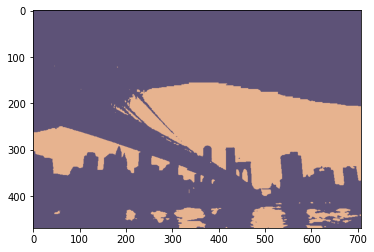


number of clusters: 3


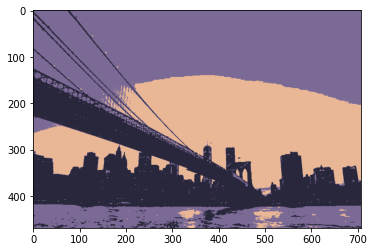


number of clusters: 5


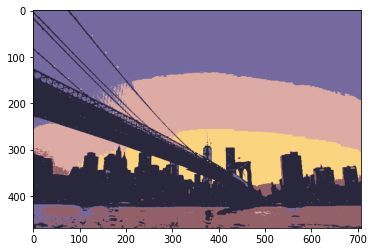


number of clusters: 10


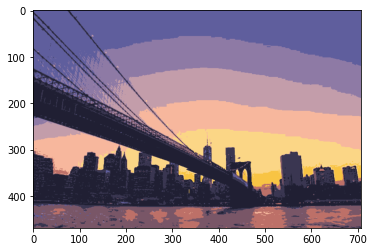

In [105]:
## Test your function: Plot your new images
random_seed = 2022
for k in [2, 3, 5, 10]:
    print("number of clusters:", k)
    new_img = question_4_1(raw_img, k, random_seed)
    plt.imshow(new_img)
    plt.show()
    print()

## **4.2 Code:** GMM - Adding coordinates *(10 pts)*
You may notice that the previous section can produce image segments that have many connected components. For some applications, this is fine, but for others, we want segments that are compact clumps of pixels. One way to achieve this is to represent each pixel with 5D vector, consisting of its R, G and B values and also its x and y coordinates. You then cluster these 5D vectors.

We will add the coordinate starting by (0,0) at top left corner as the picture below.

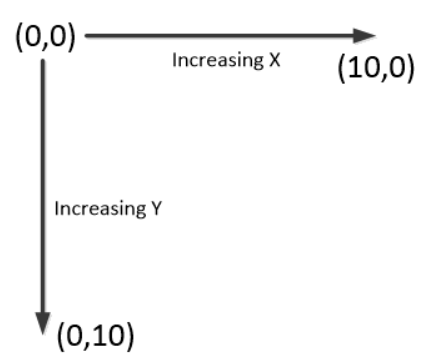

In [106]:
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/gmm2.png")

In [107]:
def question_4_2(raw_img: np.ndarray) -> np.ndarray:
    """
        Append 2 new dimensions for each pixel: (R, G, B, x, y), where x, y is the pixel's coordinates
        raw_img: numpy array, shape of (img_width, img_height, num_channels)  (e.g., (1734, 2600, 3) )
        return new 3-d numpy array, shape of (img_width, img_height, num_channels + 2)
    """
    shape = raw_img.shape

    # Write your code in this block -----------------------------------------------------------
    h, w, c = shape
    x = np.arange(w)
    y = np.arange(h)
    xx, yy = np.meshgrid(x, y)
    new_img = np.dstack((raw_img, xx, yy))
    return new_img


    # End of your code ------------------------------------------------------------------------

In [108]:
## Test your function:
new_raw_img = question_4_2(raw_img)
print("new image's shape:", new_raw_img.shape)

print("\nShow the first 5 pixels on top left corner, along y-axis:\n", new_raw_img[:5, 0, :])
print("\nShow the first 5 pixels on top left corner, along x-axis:\n", new_raw_img[0, :5, :])


## Note: the last 2 columns are x, y coordinates, respectively

new image's shape: (469, 707, 5)

Show the first 5 pixels on top left corner, along y-axis:
 [[ 66  58 105   0   0]
 [ 66  59 101   0   1]
 [ 61  55  91   0   2]
 [ 45  40  70   0   3]
 [ 25  21  46   0   4]]

Show the first 5 pixels on top left corner, along x-axis:
 [[ 66  58 105   0   0]
 [ 57  49  96   1   0]
 [ 55  47  94   2   0]
 [ 61  53 100   3   0]
 [ 65  58 102   4   0]]


number of clusters: 2


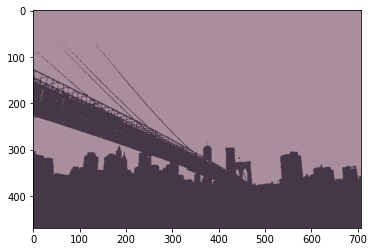


number of clusters: 3


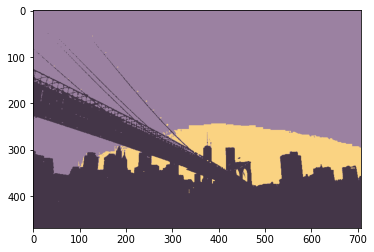


number of clusters: 5


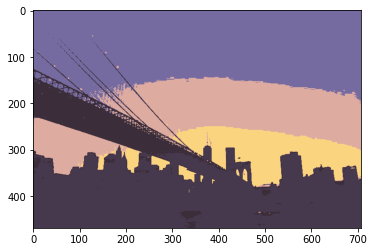


number of clusters: 10


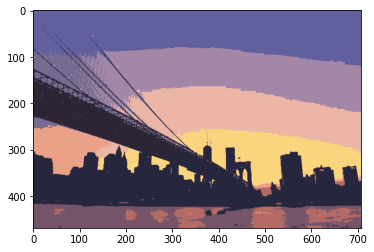

In [109]:
## Plot the new images when fitting GMM on the 5d vectors
# We'll remove the (x,y) features from the new image before plotting
random_seed = 2022
for k in [2, 3, 5, 10]:
    print("number of clusters:", k)
    new_img = question_4_1(new_raw_img, k, random_seed)
    new_img_rgb = new_img[:,:,:3]  ## remove the last 2 dimensions (x, y) from each pixel
    plt.imshow(new_img_rgb)
    plt.show()
    print()

We can observe that adding (x,y) into the features seems to force pixels near each other to belong the same cluster.

## **4.3 Short answer:** Soft clusters vs Hard clusters  *(5 pts)*
**Question:** What are soft cluster and hard cluster? Which type of cluster GMM and K-means uses?

* Soft Clusters: Each data point has a probability of belonging to multiple clusters instead of a strict assignment. For example, GMM assigns probabilities for each point to different Gaussian components.

* Hard Clusters: Each data point belongs to exactly one cluster. For instance, Kmeans assigns each point to the closest centroid.

## **4.4 Short answer:** Number of components *(5 pts)*


Similar to K-means, we need to provide the number of clusters in advance for GMM to work. How should we pick an optimal value?

We can use some analytic criterion such as the [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

The AIC value of the model is the following: AIC=2⋅𝑝 − 2⋅ln(𝐿)

The BIC value is denoted as: BIC=−2⋅ln(𝐿)+ 𝑝⋅ln(𝑁)

Where   𝐿  be the maximum value of the likelihood function for the model,  𝑝  be the number of estimated parameters in the model and  𝑁  be the total number of data points.

For both evaluation criterion, the lower the better.

It might be best to use AIC and BIC together in model selection. Alhough they usually agree on the results, BIC penalizes model complexity more heavily than AIC. In practice, we choose some numbers suggested by BIC and AIC  for `num_components`, and see which one leads to a more suitable result.

X's shape: (400, 2)


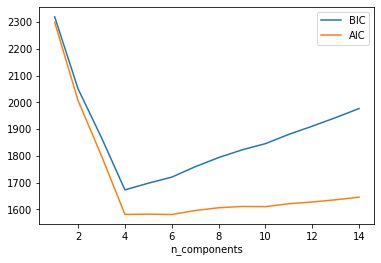

In [110]:
## Read a demo dataset
X = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/gmm_data1.csv").values
print("X's shape:", X.shape)

n_components = np.arange(1, 15)
clfs = [GMM(n, random_state=2022).fit(X) for n in n_components]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

**Question:** Which values should we choose for `num_components`? Justify your choice.

BIC reaches its minimum at $k = 4$, while AIC flattens around $k = 5$. Since BIC penalizes complexity more, it suggests a smaller $k$, while AIC allows slightly more flexibility. A safer choice to avoid overfitting would be to choose $k = 4$. However, in practice we would probably try both $k = 4$ and $5$ and evaluate their clustering results.

## **4.5 Code:** GMM - Generating new samples (*10 total points*)

With GMM, we can also generate new samples from the distribution defined by the input data.
In this section, we will generate new handwritten digits for digit 0 and 1. The dataset was sampled from [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

In [ ]:
## Read a sampling of MNIST dataset
X = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/mnist_0_and_1_sampling.csv").values
X.shape  ## we have 5k pictures in gray scale of digit 0 and 1, each has a resolution of 28x28

(5000, 784)

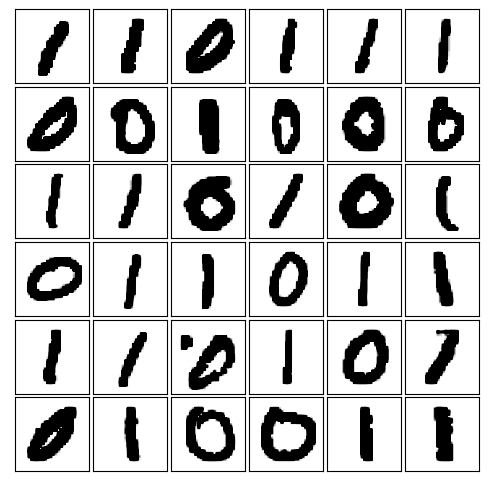

In [ ]:
def plot_digits(data):
    num_digit_figs = (6,6)
    fig_size = (6,6)
    digit_size = (28, 28)
    fig, ax = plt.subplots(*num_digit_figs, figsize=fig_size, subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(*digit_size), cmap='binary')
        im.set_clim(0, 16)

## Let's plot some pictures to get a sense of the dataset
plot_digits(X)

We will use a GMM model to generate new samples similar to the ones above.
You need to complete the function below.

In [ ]:
from sklearn.decomposition import PCA



def question_4_5(X: np.ndarray, random_seed: int = 2022, var_preserve: float = .98) -> np.ndarray:
    """
        X: digit inputs,  2-d numpy array shape of (num_samples, 784)
        random_seed: random seed, passed to GMM when initializing.
        var_preserve: float number in [0,1]
        return: 36 digit images,  2-d numpy array, shape of (36,)

    """

    # Write your code in this block -----------------------------------------------------------

    ## Step 1: Dimension reduction
    # Working on 28x28 = 784 dimensions requires a lot of computation.
    # It can also give GMM a difficult time to converge.
    # Thus, we will reduce the number of dimension by using PCA on the MNIST dataset.
    # You'll need to create a Sklearn's PCA model that preserves 98% of the variance in the recuded data.
    # Also, set random_state to `random_seed`.
    # Hint: for setting that preserves 98% variance,
    # you can take a look at attribute `n_components` when initialzing PCA object.
    # The output of this step should have a shape of (5000, 176), which means we keep the first 176 principle components.




    ## Step 2: Build a GMM model and fit it on the reduced data
    # Let's say we already used AIC and picked n_components = 140 for our GMM model.
    # You need to create a GMM model with 140 components, and set random_state to `random_seed`
    # for reproducing purpose, then fit the model on the reduced data.





    ## Step 3: from the GMM model, use method `gmm.sample()` to sample 36 images. Check out the n_samples argument.
    # Note 1: Right now, each of these new samples only has 176 dimensions.
    # In the next step, we will reconstruct the samples to have the data in 784 dimensions.
    # Note 2: `sample()` will return a tuple of both `X` and `y`, we only need `X` for the next step




    ## Step 4: Pass `X` from the previous step into `inverse_transform()` of the PCA model in step 1.
    # to reconstruct the new samples.



    ## Step 5: Return the new samples
    # Your output should have a shape of (36, 784)



    # End of your code -----------------------------------------------------------



digits_new.shape: (36, 784)


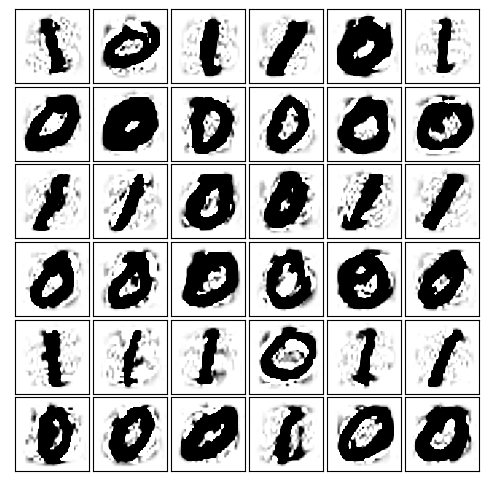

In [ ]:
## Generating new digit images
digits_new = question_4_5(X, random_seed=2022)
print("digits_new.shape:", digits_new.shape)
plot_digits(digits_new)

Although we only train a simple GMM on 5000 training samples, the new images look really amazing!

## **4.6 Code:** Compare Kmeans with GMM *(5 pts)*

Now let's compare the performance of GMM with Kmeans

In [ ]:
from sklearn.datasets import make_blobs

# Create a synthetic dataset with three Gaussian clusters
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.2, 2.5, 0.5], random_state=42)
transformation = [[0.3, 0.8], [-0.6, 1.4]]
X = np.dot(X, transformation)

def question_4_6(X: np.ndarray, n_clusters: int, random_state: int) -> float:
    """
    Train a K-means model on raw feature X.
    X: numpy array, shape of (20428, 9)
    k: number of clusters for K-means
    random_state: random seed, passed to K-means when initializing.
    return the initialized Kmeans, GMM models and their predicted labels
    """
    # Write your code in this block -----------------------------------------------------------
     #fit and predict the labels for Kmeans and GMM  with the specified random state



    # End of your code ------------------------------------------------------------------------
    return kmeans,gmm, kmeans_labels,gmm_labels

## Test your model:
k = 3  ## assume we know there should be 3 cluters
random_state = 42  ## to reproduce the same results for different runs

kmeans,gmm, kmeans_labels,gmm_labels =question_4_6(X, k, random_state)



## **4.7 Short answer :** ARI and NMI  *(5 pts)*


The Adjusted Rand Index measures the similarity between two clusterings by comparing and computing all data samples  assigned to the same or different clusters in the predicted and true clusterings. An ARI of 0.0 indicates random labeling independently of the clusters and data samples and 1.0 when the two clusterings are identical.

The Normalized Mutual Information (NMI) measures the shared information between two clusterings and  return a value that ranges from 0 to 1 where 1.0 stands for perfectly complete labeling and 0.0 represents that there is no mutual information between the two clusterings indicating that they are independent.

Let's now compute the Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) for the two algorithms using sklearn

Why do we use Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) as metrics for evaluating clustering performance? Explain the purpose and the results of the two metrics in a few short sentences. (Include your code in the solution)

Write your answer in this block

**Your Answer:**

Run the following code to visualize the results of K-Means and GMM

In [ ]:
# Plot the results
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Ground Truth')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, label='K-Means Centers')
plt.title('K-Means Clustering')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, label='GMM Centers')
plt.title('Gaussian Mixture Model Clustering')
plt.legend()

plt.show()

## **4.8 Short answer :** K-means vs GMM  *(2.5 pts)*
**Question:** Compare the performance of Kmeans with GMM, which algorithm do you think is better?
Justify your choice.



Write your answer in this block

**Your Answer:**


## **4.9 Short Answer**

### Scenario:
You have a multitude of data points, and you have decided to form **5 clusters** from them. You know that a data point can belong to multiple categories of clusters but also uniquely to one of them. You have chosen to use both **K-Means** and **Gaussian Mixture Model (GMM)** for this task.

### Task:
Answer the following question concretely:

- Which of the two algorithms (**K-Means** or **GMM** or **Both**) **CAN** be tweaked to determine how many clusters a data point belongs to during **inference**?
- Explain your choice with reasoning.

#### **(2.5 pts)**


Congrats! You have reached to the end of ps2.